# Merge Sort 

In [18]:
def f2(v,l,m,r):
    n1=(m-l)+1
    n2=(r-m)
    vLeft=[0]*n1
    vRight=[0]*n2
    for i in range(0,n1):
        vLeft[i]=v[l+i]
    
    for i in range(0,n2):
        vRight[i]=v[m+1+i]
    
    lp=0
    rp=0 #rp=>right pointer
    k=l
    #left and right arrays have been created
    
    while(lp<n1 and rp<n2):
        if(vLeft[lp]<=vRight[rp]):
            v[k]=vLeft[lp]
            lp+=1
            k+=1
        else:
            v[k]=vRight[rp]
            rp+=1
            k+=1
    while(lp<n1):
        v[k]=vLeft[lp]
        lp+=1
        k+=1
        
    while(rp<n2):
        v[k]=vRight[rp]
        rp+=1
        k+=1


def f1(v,l,r):
    if(l<r):
        m=(l+r)//2
        f1(v,l,m)
        f1(v,m+1,r)
        f2(v,l,m,r)

def mergesort(v):
    l=0
    r=len(v)-1
    print("before: ",v)
    f1(v,l,r)
    print("after: ",v)

v=[6,3,1,7,9,2]
mergesort(v)

before:  [6, 3, 1, 7, 9, 2]
after:  [1, 2, 3, 6, 7, 9]


# Quick Sort


In [9]:
def quicksort(v):
    n=len(v)
    if(n<=1):
        return v
    else:
        left=[]
        right=[]
        pivot=v[0]
        for x in range(1,n):
            if(v[x]<=pivot):
                left.append(v[x])
            else:
                right.append(v[x])
        return quicksort(left)+[pivot]+quicksort(right)

v=[1,7,4,4,1,10,9,-2]
ans=quicksort(v)
print(f"given vector {v} after sorting {ans}")

given vector [1, 7, 4, 4, 1, 10, 9, -2] after sorting [-2, 1, 1, 4, 4, 7, 9, 10]


# 0-1 Knapsack 

In [26]:
#n is the number of elements 
#W is the capacity of the bag in the begining of the problem
#w is the current capacity of the bag
#val is the array that stores profit value of each item

from copy import deepcopy
import time



def recursion(val,wt,W,n):
    if(n==0 or W==0):
        return 0
    else:
        #there are n elements , we start choosing from rhs i.e nth element
        #nth element will have index n-1
        if(wt[n-1]>W):
            #we cant choose the item as wt of item exceeds our bag capacity
            return recursion(val,wt,W,n-1)
        else:
            #we have 2 options , choose the item or reject the item
            
            #reject the item
            profit1=recursion(val,wt,W,n-1)
            
            #accept the item
            choosen.append(n-1)
            profit2=recursion(val,wt,W-wt[n-1],n-1)+val[n-1]
            ans= max(profit1,profit2)
            return ans
        
#res=recursion(val,wt,W,n)
#print(res)

def display(m):
    for x in m:
        print(x)

def generate(val,wt,W,n):
    rows=n+1
    cols=W+1
    memo=[]
    temp=[-1]*cols
    for i in range(rows):
        memo.append(temp)
    #display(memo)
    return memoise(val,wt,W,n,memo)

def memoise(val,wt,W,n,memo):
    if(n==0 or W==0):
        return 0
    else:
        
        if(memo[n][W]!=-1):
            return memo[n][W]
        else:
            #filling for the first time
            if(wt[n-1]>W):
                #we cant choose the item as wt of item exceeds our bag capacity
                memo[n][W] = memoise(val,wt,W,n-1,memo)
            else:
                #we have 2 options , choose the item or reject the item

                #reject the item
                profit1=memoise(val,wt,W,n-1,memo)

                #accept the item
                profit2=memoise(val,wt,W-wt[n-1],n-1,memo)+val[n-1]
                memo[n][W]= max(profit1,profit2)
            return memo[n][W]
                
val=[60,100,120]
wt=[10,20,30]
W=50
n=len(val)


print("via recursion")
start=time.time()
res=recursion(val,wt,W,n)
print(res)
end=time.time()
value=end-start
value=value*1000
print("Time taken ",value)

print("via memoisation")
start=time.time()
res=generate(val,wt,W,n) 
print(res)
end=time.time()

print("Time taken ",end-start)

generate(val,wt,W,n)      

via recursion
220
Time taken  1.0042190551757812
via memoisation
220
Time taken  0.0


220

# N queens

In [1]:
import numpy as np

class Nqueens():
    def __init__(self,n):
        self.n=n
        self.board=np.zeros((n,n))
        self.col=np.zeros(n)
        self.row=np.zeros(n)
        self.diag1=np.zeros(2*n)
        self.diag2=np.zeros(2*n)
        self.res=[]
        self.backtrack(0)
        
    def print_state(self):
        print("board \n",self.board)
        print("\n col \n",self.col)
        print("\n row \n",self.row)
        print("\n diag1 \n",self.diag1)
        print("\n diag2 \n",self.diag2)
        
    def test(self,i,j): #test returns True if we can place a queen on that cell
        diff=(i-j)+(self.n-1)
        summ=i+j
        if(self.board[i][j]==1):
            return False
        elif(self.col[j]==1):
            return False
        elif(self.row[i]==1):
            return False
        elif(self.diag1[diff]==1):
            return False
        elif(self.diag2[summ]==1):
            return False
        else:
            return True
        
    def fill(self,i,j,t): # pass 0 to unfill and pass 1 to fill
        diff=(i-j)+(self.n-1)
        summ=i+j
        self.board[i][j]=t
        self.row[i]=t
        self.col[j]=t
        self.diag1[diff]=t
        self.diag2[summ]=t
        
    def backtrack(self,r):
        #we have got the result when r=n
        if(r==self.n):
            snapshot=self.board.copy()
            self.res.append(snapshot)
            return
        else:
            for j in range(self.n):
                if(self.test(r,j)==True):
                    self.fill(r,j,1)
                    self.backtrack(r+1)
                    self.fill(r,j,0)
                    
case1=Nqueens(8)
print(f"\n Printing the {len(case1.res)} matrices from result board")
for m in case1.res:
    print(m)
    print("\n")



 Printing the 92 matrices from result board
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]


[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]


[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]]


[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]]


[[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.

# TSP using Branch and Bound

In [62]:
import numpy as np
from copy import deepcopy 

class TSP():
    def __init__(self,dist):
        self.dist=dist
        self.og=deepcopy(dist)
        self.display(dist)
        self.grand_parents=[]
        self.rows=len(dist)
        self.n=self.rows
        self.cols=self.n
        self.children=[]
        self.precompute()
        
        self.bnb()
        
        
    def precompute(self):
        for c in range(self.n):
            self.children.append(c)
        
    
    def display(self,m):
        print("\n")
        for x in m:
            print(x)
    
    def reduce(self,m,p,c):
        pr=False
        if(p==-1 and c==-1):
            pr=True
        reduction_cost=0
        if(pr==True):
            self.display(m)
        for i in range(self.rows):
            lv=np.inf
            for j in range(self.cols):
                #print(f"i:{i} j:{j}")
                lv=min(lv,m[i][j])
            if(lv==np.inf):
                continue
            reduction_cost+=lv
            for j in range(self.cols):
                m[i][j]-=lv
         
        if(pr==True):
            print("horizontal reduction cost",reduction_cost)
               
        for j in range(self.cols):
            lv=np.inf
            for i in range(self.rows):
                lv=min(lv,m[i][j])
            if(lv==np.inf):
                continue
            reduction_cost+=lv
            
            for i in range(self.rows):
                m[i][j]-=lv
        
        return m,reduction_cost
        
    def make_inf(self,m,parent_row,child_col):
        for i in range(self.cols):
            m[parent_row][i]=np.inf
        for i in range(self.rows):
            m[i][child_col]=np.inf
            
    def block_parent(self,m,child):
        for x in self.grand_parents:
            m[child][x]=np.inf
            
    def traverse_city(self,parent,child,parent_cost,cell_val,m):
        cost=parent_cost+cell_val
        self.make_inf(m,parent,child)
        self.block_parent(m,child)
        m,child_cost=self.reduce(m,parent,child)
        cost+=child_cost
        if(parent==-1):
            print(f"\ncost:break_down parent:{parent} child:{child} \n parent_cost={parent_cost} child_cost={child_cost} cell_val={cell_val} net:{cost}")
        return cost,m

            
    def bnb(self):
        #let oth vertexx be our source vertex
        parent=0
        child=0
        generation=0
        m,parent_cost=self.reduce(dist,parent,child)
        #to select a suitable child we iterate over all children
        self.grand_parents.append(parent)
        tsp_cost=0
        while(generation<self.n-1):
            lc=np.inf
            next_gen_mat=[]
            for c in self.children:
                cell_val=m[parent][c]
                temp=deepcopy(m)
                cost,temp2=self.traverse_city(parent,c,parent_cost,cell_val,temp)
                if(cost<lc):
                    #print(f"lc:{lc} new value {cost}")
                    lc=cost
                    child=c
                    next_gen_mat=temp2
            #once this for loop is over current generation is done
            
            # time to switch parents
            #print(f"\nfor parent {parent} child {child} was selected as next generation parent")
            #print(f"old cost {parent_cost} and new cost is {lc}")
            parent=child
            self.grand_parents.append(parent)
            parent_cost=lc
            tsp_cost=lc
            #time to switch to next gen matrix
            m=next_gen_mat
            generation+=1
        #while loop is over , the order of grand parents array is the order of your city traversal
        last=self.grand_parents[self.n-1]
        
        #print("last ",last)
        additional_cost=self.og[last][0]
        #print("add: ",additional_cost)
        tsp_cost+=additional_cost
        self.grand_parents.append(0)
        print("TSP via branch and bound complete: total cost being: ",tsp_cost)
        print("Route taken :",self.grand_parents)
        return self.grand_parents
        
        
        
dist=[[np.inf,20,30,10,11],[15,np.inf,16,4,2],[3,5,np.inf,2,4],[19,6,18,np.inf,3],[16,4,7,16,np.inf]]

m=[[np.inf,14,12,1,11,12,19,4,20,16],
[14,np.inf,9,2,13,15,17,5,2,19],
[12,9,np.inf,6,2,15,14,11,3,19],
[1,2,6,np.inf,9,13,2,2,19,2],
[11,13,2,9,np.inf,7,18,9,4,6],
[12,15,15,13,7,np.inf,4,4,20,7],
[19,17,14,2,18,4,np.inf,15,1,8],
[4,5,11,2,9,4,15,np.inf,11,17],
[20,2,3,19,4,20,1,11,np.inf,20],
[16,19,19,2,6,7,8,17,20,np.inf]] 

object1=TSP(m)






[inf, 14, 12, 1, 11, 12, 19, 4, 20, 16]
[14, inf, 9, 2, 13, 15, 17, 5, 2, 19]
[12, 9, inf, 6, 2, 15, 14, 11, 3, 19]
[1, 2, 6, inf, 9, 13, 2, 2, 19, 2]
[11, 13, 2, 9, inf, 7, 18, 9, 4, 6]
[12, 15, 15, 13, 7, inf, 4, 4, 20, 7]
[19, 17, 14, 2, 18, 4, inf, 15, 1, 8]
[4, 5, 11, 2, 9, 4, 15, inf, 11, 17]
[20, 2, 3, 19, 4, 20, 1, 11, inf, 20]
[16, 19, 19, 2, 6, 7, 8, 17, 20, inf]


IndexError: list index out of range

least cost incured:  35
chosen path  (0, 3, 9, 4, 2, 1, 8, 6, 5, 7)


# TSP using genetic

# Matrix Multiplication

In [58]:
# Python3 Program to multiply two matrix using multi-threading
from threading import Thread

MAX = 4
MAX_THREAD = 4

matC = [[0 for i in range(MAX)] for j in range(MAX)]#created a 0 matrix of 4 by 4
step_i = 0

# Function to print matrix in readable format
def printMatrix(mat):
    for row in mat:
        print(row)

# Function to multiply a row of matrix A
# with entire matrix B to get a row of matrix C
def multi():
    global step_i, matC
    i = step_i
    step_i = step_i + 1
    for j in range(MAX):
        for k in range(MAX):
            matC[i][j] = matC[i][j] + matA[i][k] * matB[k][j]

if __name__ == "__main__":
    # matrix A used for muliplication
    matA = [[3,7,3,6],
            [9,2,0,3],
            [0,2,1,7],
            [2,2,7,9]]

    # matrix B used for multiplication
    matB = [[6,5,5,2],
            [1,7,9,6],
            [6,6,8,9],
            [0,3,5,2]]
    # creating list of size MAX_THREAD
    thread = list(range(MAX_THREAD))
    # creating MAX_THEAD number of threads
    for i in range(MAX_THREAD):
        thread[i] = Thread(target=multi)
        thread[i].start()

    # Waiting for all threads to finish
    for i in range(MAX_THREAD):
        thread[i].join()
	
# Printing the resultant matrix C = A x B
printMatrix(matC)


[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
[43, 100, 132, 87]
[56, 68, 78, 36]
[8, 41, 61, 35]
[56, 93, 129, 97]


# Extras


## Tsp using Permutation and Combination

In [63]:
from copy import deepcopy
import numpy as np
import itertools

def p2(ip):
    mainline=list(itertools.permutations(ip))
    return mainline


        

def generate(n):
    cities=[]
    for x in range(n):
        cities.append(x)
    op=[]
    mainline=[]
    n=len(cities)
    mainline=p2(cities)
    return mainline
    
    
def solve(dist):
    n=len(dist)
    mainline=generate(n)
    lc=np.inf
    chosen_path=[]
    for tup in mainline:
        cost=0
        for j in range(n-1):
            s=tup[j]
            d=tup[j+1]
            curr=dist[s][d]
            cost+=curr
            if(curr==np.inf):
                break
        j+=1
        s=tup[j]
        d=tup[0]
        cost+=dist[s][d]
        if(cost<lc):
            chosen_path=tup
            lc=cost
    print("least cost incured: ",lc)
    print("chosen path ",chosen_path)
        

m=[[np.inf,14,12,1,11,12,19,4,20,16],
[14,np.inf,9,2,13,15,17,5,2,19],
[12,9,np.inf,6,2,15,14,11,3,19],
[1,2,6,np.inf,9,13,2,2,19,2],
[11,13,2,9,np.inf,7,18,9,4,6],
[12,15,15,13,7,np.inf,4,4,20,7],
[19,17,14,2,18,4,np.inf,15,1,8],
[4,5,11,2,9,4,15,np.inf,11,17],
[20,2,3,19,4,20,1,11,np.inf,20],
[16,19,19,2,6,7,8,17,20,np.inf]]  

#dist=[[np.inf,20,30,10,11],[15,np.inf,16,4,2],[3,5,np.inf,2,4],[19,6,18,np.inf,3],[16,4,7,16,np.inf]]

solve(m)

print(m[7][0])


least cost incured:  35
chosen path  (0, 3, 9, 4, 2, 1, 8, 6, 5, 7)
4


## TSP using Dynamic Programing

In [39]:
# there are four nodes in example graph (graph is 1-based)

# dist[i][j] represents shortest distance to go from i to j
# this matrix can be calculated for any given graph using
# all-pair shortest path algorithms


dist=[[np.inf,14,12,1,11,12,19,4,20,16],
[14,np.inf,9,2,13,15,17,5,2,19],
[12,9,np.inf,6,2,15,14,11,3,19],
[1,2,6,np.inf,9,13,2,2,19,2],
[11,13,2,9,np.inf,7,18,9,4,6],
[12,15,15,13,7,np.inf,4,4,20,7],
[19,17,14,2,18,4,np.inf,15,1,8],
[4,5,11,2,9,4,15,np.inf,11,17],
[20,2,3,19,4,20,1,11,np.inf,20],
[16,19,19,2,6,7,8,17,20,np.inf]]

n=9

# memoization for top down recursion
memo = [[-1]*(1 << (n+1)) for _ in range(n+1)]


def fun(i, mask):
	# base case
	# if only ith bit and 1st bit is set in our mask,
	# it implies we have visited all other nodes already
	if mask == ((1 << i) | 3):
		return dist[1][i]

	# memoization
	if memo[i][mask] != -1:
		return memo[i][mask]

	res = 10**9 # result of this sub-problem

	# we have to travel all nodes j in mask and end the path at ith node
	# so for every node j in mask, recursively calculate cost of
	# travelling all nodes in mask
	# except i and then travel back from node j to node i taking
	# the shortest path take the minimum of all possible j nodes
	for j in range(1, n+1):
		if (mask & (1 << j)) != 0 and j != i and j != 1:
			res = min(res, fun(j, mask & (~(1 << i))) + dist[j][i])
	memo[i][mask] = res # storing the minimum value
	return res


# Driver program to test above logic
ans = 10**9
for i in range(1, n+1):
	# try to go from node 1 visiting all nodes in between to i
	# then return from i taking the shortest route to 1
	ans = min(ans, fun(i, (1 << (n+1))-1) + dist[i][1])

print("The cost of most efficient tour = " + str(ans))

# This code is contributed by Serjeel Ranjan


The cost of most efficient tour = 29


In [41]:
dist=[[np.inf,14,12,1,11,12,19,4,20,16],
[14,np.inf,9,2,13,15,17,5,2,19],
[12,9,np.inf,6,2,15,14,11,3,19],
[1,2,6,np.inf,9,13,2,2,19,2],
[11,13,2,9,np.inf,7,18,9,4,6],
[12,15,15,13,7,np.inf,4,4,20,7],
[19,17,14,2,18,4,np.inf,15,1,8],
[4,5,11,2,9,4,15,np.inf,11,17],
[20,2,3,19,4,20,1,11,np.inf,20],
[16,19,19,2,6,7,8,17,20,np.inf]]  

n=len(dist)-1

memo = [[-1]*(1 << (n+1)) for _ in range(n+1)]


def fun(i, mask):

	if mask == ((1 << i) | 3):
		return dist[1][i]

	if memo[i][mask] != -1:
		return memo[i][mask]

	res = 10**9
	for j in range(1, n+1):
		if (mask & (1 << j)) != 0 and j != i and j != 1:
			res = min(res, fun(j, mask & (~(1 << i))) + dist[j][i])
	memo[i][mask] = res # storing the minimum value
	return res

ans = 10**9
for i in range(1, n+1):
	ans = min(ans, fun(i, (1 << (n+1))-1) + dist[i][1])

print("The cost of most efficient tour = " + str(ans))

The cost of most efficient tour = 29


In [48]:
import numpy as np

def setup(m,memo,S,n):
    for i in range(n):
        if(i==S):
            continue
        memo[i][1<<S|1<<i]=m[S][i]
        
def solve(m,memo,S,n):
    for r in range(3,n+1):
        for subset in combinations(r,n):
            if S not in subset:
                continue
            for nextN in range(n):
                if(nextN==S or nextN not in subset ):
                    continue
                state=subset^(1<<nextN)
                minDist = np.inf
                for e in range(n):
                    if(e==S || e==nextN || e not in subset):
                        continue
                    newDist=memo[e][state]+m[e][nextN]
                    minDist=min(newDist,minDist)
                    memo[nextN][subset]=minDist

def tsp(m,S):
    n=4
    rows=n
    cols=2**n
    memo=np.zeros([rows,cols])
    setup(m,memo,S,n)
    solve(m,memo,S,n)
    print(memo)
    
dist=[[np.inf,20,30,10,11],[15,np.inf,16,4,2],[3,5,np.inf,2,4],[19,6,18,np.inf,3],[16,4,7,16,np.inf]]   
tsp(m,0)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 14.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]]


In [61]:
# Python3 Program to multiply two matrix using multi-threading
from threading import Thread

MAX = 4
MAX_THREAD = 4

matC = [[0 for i in range(MAX)] for j in range(MAX)]#created a 0 matrix of 4 by 4
step_i = 0

# Function to print matrix in readable format
def printMatrix(mat):
    for row in mat:
        print(row)

# Function to multiply a row of matrix A
# with entire matrix B to get a row of matrix C
def multi():
    global step_i, matC
    i = step_i
    step_i = step_i + 1
    for j in range(MAX):
        for k in range(MAX):
            matC[i][j] = matC[i][j] + matA[i][k] * matB[k][j]

if __name__ == "__main__":
    # matrix A used for muliplication
    matA = [[3,7,3,6],
            [9,2,0,3],
            [0,2,1,7],
            [2,2,7,9]]

    # matrix B used for multiplication
    matB = [[6,5,5,2],
            [1,7,9,6],
            [6,6,8,9],
            [0,3,5,2]]
    # creating list of size MAX_THREAD
    thread = list(range(MAX_THREAD)) #create an array from 0th to n-1 elements
    
    # creating MAX_THEAD number of threads
    for i in range(MAX_THREAD):
        thread[i] = Thread(target=multi)
        thread[i].start()

    # Waiting for all threads to finish
    for i in range(MAX_THREAD):
        thread[i].join()
	
# Printing the resultant matrix C = A x B
printMatrix(matC)


[0, 1, 2, 3]
[43, 100, 132, 87]
[56, 68, 78, 36]
[8, 41, 61, 35]
[56, 93, 129, 97]


## Ploting line graph in python


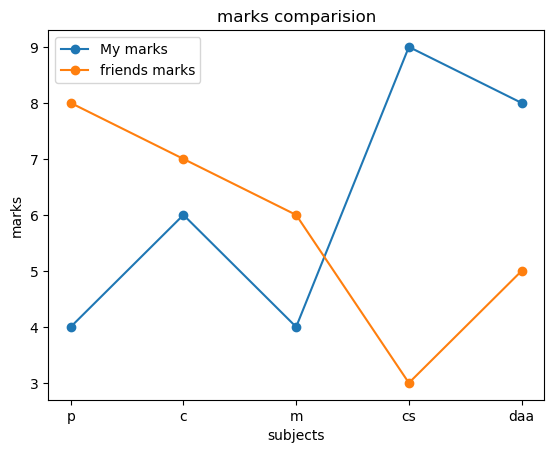

In [16]:
import matplotlib.pyplot as plt
subjects=['p','c','m','cs','daa']
my_marks=[4,6,4,9,8]
frineds_marks=[8,7,6,3,5]

plt.plot(subjects,my_marks,label="My marks",marker='o')
plt.plot(subjects,frineds_marks,label="friends marks",marker='o')

plt.xlabel("subjects")
plt.ylabel("marks")
plt.title("marks comparision")
plt.legend()
plt.show()

## Timing your python code

In [36]:

import time
from copy import deepcopy
import random

def f2(v,l,m,r):
    n1=(m-l)+1
    n2=(r-m)
    vLeft=[0]*n1
    vRight=[0]*n2
    for i in range(0,n1):
        vLeft[i]=v[l+i]
    
    for i in range(0,n2):
        vRight[i]=v[m+1+i]
    
    lp=0
    rp=0 #rp=>right pointer
    k=l
    #left and right arrays have been created
    
    while(lp<n1 and rp<n2):
        if(vLeft[lp]<=vRight[rp]):
            v[k]=vLeft[lp]
            lp+=1
            k+=1
        else:
            v[k]=vRight[rp]
            rp+=1
            k+=1
    while(lp<n1):
        v[k]=vLeft[lp]
        lp+=1
        k+=1
        
    while(rp<n2):
        v[k]=vRight[rp]
        rp+=1
        k+=1


def f1(v,l,r):
    if(l<r):
        m=(l+r)//2
        f1(v,l,m)
        f1(v,m+1,r)
        f2(v,l,m,r)

def mergesort(v):
    temp=deepcopy(v)
    l=0
    r=len(v)-1
    print("Merge sort")
    print("before: ",v)
    f1(temp,l,r)
    print("after: ",temp)
    
def quicksort(v):
    
    n=len(v)
    if(n<=1):
        return v
    else:
        left=[]
        right=[]
        pivot=v[0]
        for x in range(1,n):
            if(v[x]<=pivot):
                left.append(v[x])
            else:
                right.append(v[x])
        return quicksort(left)+[pivot]+quicksort(right)
    
def quick(v):
    temp=deepcopy(v)
    ans=quicksort(temp)
    print("\n\n Quicksort")
    print(f"given vector {v} after sorting {ans}")

def time_series(v,quick_time,merge_time,stl_time):
    start=time.time()
    mergesort(v)
    end=time.time()
    merge_time.append(end-start)
    start=time.time()
    quick(v)
    end=time.time()
    quick_time.append(end-start)
    start=time.time()
    v.sort()
    end=time.time()
    stl_time.append(end-start)

def generate(n,v):
    for i in range(n):
        x=random.randint(0,10000000)
        v.append(x)
    
    
#time taken vs algorithm name
def solve(n):
    algorithms=["quicksort","mergesort","stl_sort"]
    quick_time=[]
    merge_time=[]
    stl_time=[]
    v=[]
    generate(n,v)
    time_series(v,quick_time,merge_time,stl_time)
    print(merge_time,quick_time,stl_time)
    
solve(10000000000000000000)


MemoryError: 